# 单变量线性回归

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [40]:
path = 'data/regress_data1.csv'
# path = r'./data/a.txt'
data = pd.read_csv(path)
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [41]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


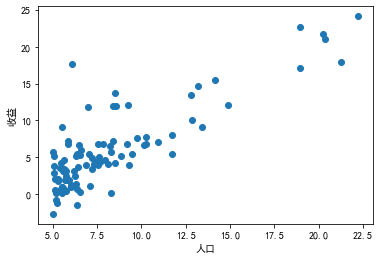

In [42]:
x = data['人口']
y = data['收益']
plt.figure()
plt.scatter(x,y)
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()


现在让我们使用梯度下降来实现线性回归，以最小化代价函数。

首先，我们将创建一个以参数为特征函数的代价函数

$J(w)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h\left(x^{(i)}\right)-y^{(i)}\right)^{2}$
其中
$h(x)=w^{T} X=w_{0} x_{0}+w_{1} x_{1}+w_{2} x_{2}+\ldots+w_{n} x_{n}$

In [43]:
def J(X, y, w):
    inner = np.power((np.dot(X,w.T) - y), 2)
    return np.sum(inner) / (2* x.shape[0])

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [44]:
data.insert(0, 'Ones', 1)
data

,Ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


变量初始化。

In [45]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,:cols-1]#X是所行，去掉最后一列
y = data.iloc[:,cols-1:]#X是所行，最后一列

print(X.head())
print(y.head())

   Ones      人口
0     1  6.1101
1     1  5.5277
2     1  8.5186
3     1  7.0032
4     1  5.8598
        收益
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。我们还需要初始化w。

In [46]:
X = np.array(X)
y = np.array(y)
w = np.array(np.array([0,0])).reshape([1,2])

print(X.shape)
print(y.shape)
print(w.shape)

(97, 2)
(97, 1)
(1, 2)


计算代价函数 (theta初始值为0).

In [47]:
J(X, y, w)


32.072733877455676

Batch Gradient Decent（批量梯度下降）

$w_{j}:=w_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m} \frac{\partial}{\partial w_{j}} J(w)$

In [48]:
def batch_gradientDescent(X,y,w, alpha, iters):
    tmp = np.zeros(w.shape)
    parameters = X.shape[1]
    cost = np.zeros(iters)
    
    for i in range(iters):
        # print(X.shape, w.shape)
        err = np.dot(X, w.T) - y
        
        for j in range(parameters):
            # print(err.shape, X[:, j].shape)
            term = np.multiply(err, X[:, j].reshape(len(X[:,j]), 1))
            # print(term)
            tmp[0, j] = w[0, j] - ((alpha/len(X)) * np.sum(term))
            
        w = tmp
        cost[i] = J(X, y, w)
    return w, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [49]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [50]:
g, cost = batch_gradientDescent(X, y, w, alpha, iters)
g

array([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [51]:
J(X, y, g)

4.515955503078914

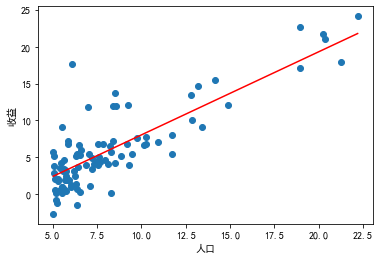

In [52]:
x_fig = np.linspace(x.min(), x.max(), 100)
y_fig = g[0,0] + x_fig * g[0, 1]

plt.scatter(x, y)
plt.plot(x_fig, y_fig, 'r')
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。请注意，代价总是降低 - 这是凸优化问题的一个例子。

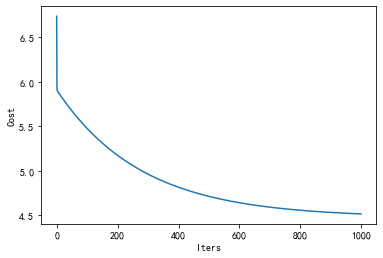

In [53]:
plt.plot(np.arange(iters), cost)
plt.xlabel('Iters')
plt.ylabel('Cost')
plt.show()

## 多变量线性回归
练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。我们使用我们已经应用的技术来分析数据集。

In [104]:
path2 = 'data/regress_data2.csv'
data2 = pd.read_csv(path2)
# print(data2.head())
data2 = (data2 - data2.mean()) / data2.std()

data2.insert(0, 'Ones', 1)
cols = data2.shape[1]
X2 = data2.iloc[:,:cols-1]
y2 = data2.iloc[:, cols-1]
print(X2.shape, '-->', y2.shape)

# convert to matrices and initialize theta
w2 = np.array([0,0,0])
# print(w2.shape)


def batch_gradientDescent(X,y,w, alpha, iters):
    tmp = np.zeros(w.shape)
    parameters = X.shape[1]
    cost = np.zeros(iters)

    for i in range(iters):
        # print(X.shape, w.shape)
        err = np.dot(X, w.T) - y
        # print(err)
        # print(np.multiply(np.array(err),np.array(X.iloc[:,0])))
        for j in range(parameters):
            # print(X.reshape(len(X), 1))
            # print(np.array(X.iloc[:, j]))
            term = np.multiply(np.array(err), np.array(X.iloc[:,j]))
            # print(term)
            # print(j)
            # print(((alpha/len(X)) * np.sum(term)))
            tmp[j] = w[j] - ((alpha/len(X)) * np.sum(term))
        w = tmp
        cost[i] = J(X, y, w)
    return w, cost

g2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)
a = J(X2, y2, g2)
print(a)
# J(X2, y2, g2)

(47, 3) --> (47,)
0.06333049867590503
